## Observations and Insights

## Dependencies and starter code

In [ ]:
Observations
1. Looking at the information provided by the SEM statistics, the drug Ramicane has the smallest SEM @ 0.320955.
This would suggest that Ramicane, quickly followed by Capomulin, would be the 2 drugs that would warrent further trials.

2. According to the pie chart, the gender was almost perfectly split 50/50 between male and female which would be beneficial
when looking at wether a drug would be gender biased.

3. The line graph shows Capomulin to achieve a reduction in tumor size. However shortly after each injection the tumor achieves
growth again.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as std
import numpy as np
# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
df = pd.merge(study_results,mouse_metadata, how='left', on="Mouse ID")
#df.to_csv('mouse_study.csv', index=False)
df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


## Summary statistics

In [3]:
#finding the mean, median, s
tumorsmean = df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
tumorsmedian = df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
tumorsstd = df.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
tumorsvar = df.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
tumorssem = df.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]
tumorssem

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.512884
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [4]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regime
data_table = pd.DataFrame({'Mean': tumorsmean,
             'Median': tumorsmedian,
             "Variance": tumorsvar,
             'Std Dev': tumorsstd,
             "SEM": tumorssem})
data_table

,Mean,Median,Variance,Std Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [5]:
print(f"Roughly 68% of the data is between {round(tumorsmean-tumorsstd,3)} and {round(tumorsmean+3)}")
print(f"Roughly 95% of the data is between {round(tumorsmean-2*tumorsstd,3)} and {round(tumorsmean+2*tumorsstd-3)}")
print(f"Roughly 99.7% of the data is between {round(tumorsmean-3*tumorsstd,3)} and {round(tumorsmean+3*tumorsstd-3)}")

Roughly 68% of the data is between Drug Regimen
Capomulin    35.681
Ceftamin     46.323
Infubinol    46.318
Ketapril     46.956
Naftisol     46.197
Placebo      46.213
Propriva     45.815
Ramicane     35.370
Stelasyn     46.523
Zoniferol    46.270
Name: Tumor Volume (mm3), dtype: float64 and Drug Regimen
Capomulin    44.0
Ceftamin     56.0
Infubinol    56.0
Ketapril     58.0
Naftisol     57.0
Placebo      57.0
Propriva     55.0
Ramicane     43.0
Stelasyn     57.0
Zoniferol    56.0
Name: Tumor Volume (mm3), dtype: float64
Roughly 95% of the data is between Drug Regimen
Capomulin    30.686
Ceftamin     40.055
Infubinol    39.750
Ketapril     38.676
Naftisol     38.062
Placebo      38.392
Propriva     39.307
Ramicane     30.524
Stelasyn     38.812
Zoniferol    39.303
Name: Tumor Volume (mm3), dtype: float64 and Drug Regimen
Capomulin    48.0
Ceftamin     62.0
Infubinol    63.0
Ketapril     69.0
Naftisol     68.0
Placebo      67.0
Propriva     62.0
Ramicane     47.0
Stelasyn     67.0
Zonif

## Bar plots

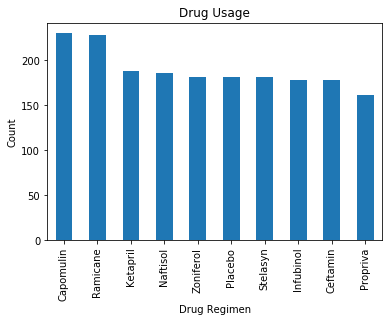

In [6]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
count = df['Drug Regimen'].value_counts()
count.plot(kind='bar')
plt.xlabel("Drug Regimen")
plt.ylabel("Count")
plt.title("Drug Usage")
plt.show()

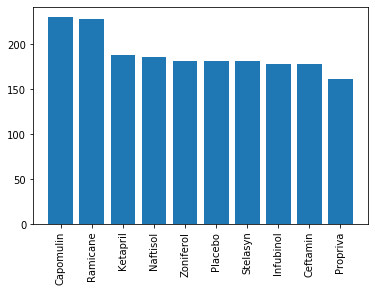

In [7]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
count = df['Drug Regimen'].value_counts()
plt.bar(count.index.values, count.values)
plt.xticks(rotation=90)
plt.show()

## Pie plots

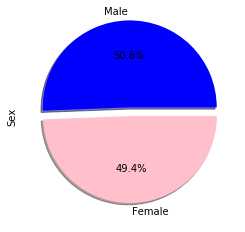

In [8]:
gender_count = df["Sex"].value_counts()
x = gender_count
labels = ('Male', 'Female')
explode = (0.1, 0)
colors = ('blue', 'pink')
gender_count.plot.pie(explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=0)
plt.show()

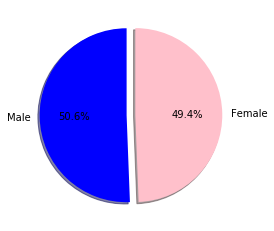

In [9]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_count = df["Sex"].value_counts()
x = gender_count
labels = ('Male', 'Female')
explode = (0.1, 0)
colors = ('blue', 'pink')
plt.pie(x, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)

plt.show()

## Quartiles, outliers and boxplots

In [10]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.
max_tumor = df.groupby(["Mouse ID"])['Timepoint'].max()
max_tumor = max_tumor.reset_index()
mergedata = max_tumor[['Mouse ID', 'Timepoint']].merge(df, on=['Mouse ID','Timepoint'],how="left")
#Using the SEM we find that the four most promising are as follows.
capomulin = mergedata.loc[mergedata["Drug Regimen"] == "Capomulin"]['Tumor Volume (mm3)']
ramicane = mergedata.loc[mergedata["Drug Regimen"] == "Ramicane"]['Tumor Volume (mm3)']
infubinol = mergedata.loc[mergedata["Drug Regimen"] == "Infubinol"]['Tumor Volume (mm3)']
ceftamin = mergedata.loc[mergedata["Drug Regimen"] == "Ceftamin"]['Tumor Volume (mm3)']
pd.DataFrame({'Capomulin': capomulin,
             'Ramicane': ramicane,
             'Infubinol': infubinol,
             'Ceftamin': ceftamin})


,Capomulin,Ramicane,Infubinol,Ceftamin
0,NaN,NaN,67.973419,NaN
1,NaN,NaN,65.525743,NaN
3,NaN,NaN,NaN,62.999356
6,NaN,38.407618,NaN,NaN
7,NaN,43.047543,NaN,NaN
...,...,...,...,...
239,NaN,NaN,NaN,68.594745
240,31.896238,NaN,NaN,NaN
241,NaN,NaN,NaN,64.729837
245,NaN,30.638696,NaN,NaN


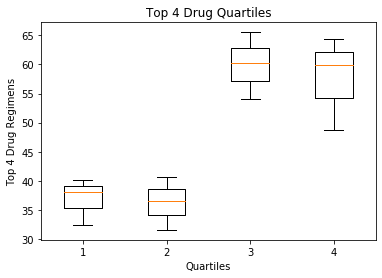

In [17]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
quartiles = capomulin.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
quartiles2 = ramicane.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
quartiles3 = infubinol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
quartiles4 = ceftamin.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
fig1, ax1 = plt.subplots()
ax1.boxplot([quartiles, quartiles2, quartiles3, quartiles4]), 
xticks =['Capomulin','Ramicane','Infubinol','Ceftamin']
plt.xlabel('Quartiles')
plt.ylabel('Top 4 Drug Regimens')
plt.title('Top 4 Drug Quartiles')
plt.show()

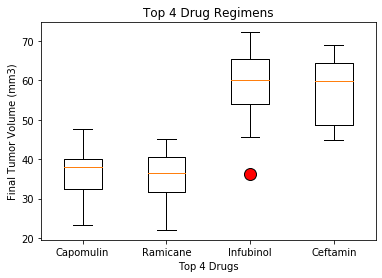

In [12]:
orange_out = dict(markerfacecolor='red',markersize=12)
plt.boxplot([capomulin,ramicane,infubinol,ceftamin],labels=['Capomulin','Ramicane','Infubinol','Ceftamin'],flierprops=orange_out)
plt.ylabel('Final Tumor Volume (mm3)')
plt.xlabel("Top 4 Drugs")
plt.title('Top 4 Drug Regimens')
plt.show()

## Line and scatter plots

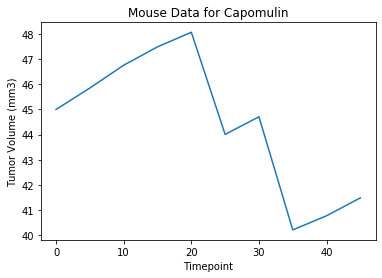

In [13]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
#plt.plot(['Timepoint', "Capomulin"])
filter1 = df.loc[df['Drug Regimen']== 'Capomulin']
mousedata = filter1.loc[filter1['Mouse ID']=='l509']
plt.plot(mousedata['Timepoint'], mousedata['Tumor Volume (mm3)'])
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Mouse Data for Capomulin')
plt.show()



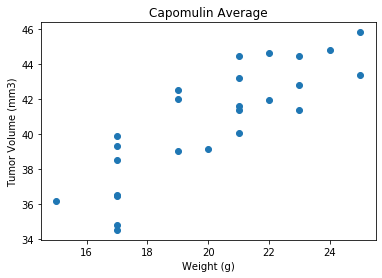

In [14]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
filter1 = df.loc[df['Drug Regimen']== 'Capomulin']
capomulinavg = filter1.groupby(['Mouse ID']).mean()
plt.scatter(capomulinavg['Weight (g)'], capomulinavg['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin Average')
plt.show()

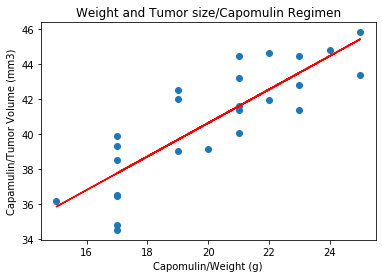

In [15]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
correalation = round(std.pearsonr(capomulinavg['Weight (g)'],capomulinavg['Tumor Volume (mm3)'])[0],2)
model = std.linregress(capomulinavg['Weight (g)'],capomulinavg['Tumor Volume (mm3)'])
yvalues = capomulinavg['Weight (g)']* model[0]+model[1]
plt.scatter(capomulinavg['Weight (g)'], capomulinavg['Tumor Volume (mm3)'])
plt.plot(capomulinavg['Weight (g)'], yvalues, color = 'red')
plt.xlabel("Capomulin/Weight (g)")
plt.ylabel("Capamulin/Tumor Volume (mm3)")
plt.title('Weight and Tumor size/Capomulin Regimen')
plt.show()